<a href="https://colab.research.google.com/github/Mamoro98/Statistics/blob/main/Assignment1_Omer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init


In [4]:
!pip install tableone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.2 MB/s eta 0:00:00


In [6]:
from tableone import TableOne
import pandas as pd

# Table one

In [7]:
df = pd.read_csv('/content/meni.csv')

In [11]:
df.head()

,id,dateI,district,uneb_strata,ownership,ageg,cgeduc,age_first,dayschool,religion,Muganda,hhsize,difficulty,knowledge,painmgt,math_conf,science_conf,school
0,W52-162F,2022-05-13,Wakiso,High UNEB,Private,16,Secondary,15.0,Boarding,Protestant/Born Again/SDA,Muganda,10+ people,7,3,No,1.666667,1.5,52
1,W32-155F,2022-06-12,Wakiso,High UNEB,Private,15,More than secondary,13.0,Boarding,Muslim,Non_Muganda,6-10 people,25,4,No,0.777778,2.5,32
2,K17-109F,2022-04-01,Kalungu,High UNEB,Private,16,More than secondary,13.0,Boarding,Protestant/Born Again/SDA,Muganda,<5 people,16,5,No,2.555556,1.0,17
3,K15-135F,2022-03-25,Kalungu,High UNEB,Private,15,More than secondary,12.0,Boarding,Protestant/Born Again/SDA,Non_Muganda,6-10 people,3,6,No,2.333333,2.0,15
4,K06-274F,2022-06-05,Kalungu,High UNEB,Private,17,Primary,15.0,Boarding,Protestant/Born Again/SDA,Non_Muganda,6-10 people,19,3,Yes,1.666667,1.5,6


In [10]:
df.columns

Index(['id', 'dateI', 'district', 'uneb_strata', 'ownership', 'ageg', 'cgeduc',
       'age_first', 'dayschool', 'religion', 'Muganda', 'hhsize', 'difficulty',
       'knowledge', 'painmgt', 'math_conf', 'science_conf', 'school'],
      dtype='object')

In [14]:
groupby = 'dayschool'
categorical = ['religion', 'cgeduc']
continuous = ['math_conf', 'science_conf', 'age_first']


table = TableOne(df, columns=categorical + continuous, categorical=categorical, groupby=groupby, pval=True)


print(table)


                                                  Grouped by dayschool                                            
                                                               Missing     Overall    Boarding         Day P-Value
n                                                                             1164         516         648        
religion, n (%)         Catholic                                        355 (30.5)  154 (29.8)  201 (31.0)   0.762
                        Muslim                                          349 (30.0)  163 (31.6)  186 (28.7)        
                        None/Other                                         5 (0.4)     2 (0.4)     3 (0.5)        
                        Protestant/Born Again/SDA                       455 (39.1)  197 (38.2)  258 (39.8)        
cgeduc, n (%)           Don't know                                      202 (17.4)   82 (15.9)  120 (18.5)  <0.001
                        More than secondary                             292 (25.

In [15]:
# Religion does not significantly differ between day and boarding students (p = 0.762).
# Caregiver education level significantly differs (p < 0.001), with more educated caregivers in the boarding group.
# Mathematics confidence is slightly higher for boarding students (p = 0.008).
# Science confidence does not significantly differ between groups (p = 0.088).
# Day school students tend to be slightly older than boarding school students (p < 0.001).

In [16]:
# Introduction to the MENISCUS Study
# The MENISCUS study aims to explore factors influencing educational outcomes among schoolchildren, focusing on aspects such as school type, confidence in mathematics and science, and caregiver education. Data was collected through structured interviews conducted between [INSERT INTERVIEW DATE RANGE], capturing demographic, educational, and psychosocial characteristics. The study seeks to analyze variations in these characteristics between students attending boarding and day schools.

In [17]:
# Summary of Table 1 Results
# Our analysis reveals key differences between boarding and day school students. Notably, caregivers of boarding school students tend to have higher education levels (p < 0.001), while math confidence is slightly higher among boarding students (p = 0.008). In contrast, science confidence does not differ significantly between the two groups (p = 0.088). Furthermore, day school students are, on average, slightly older than boarding students (p < 0.001), suggesting possible differences in school entry age or progression rates. Religious distribution, however, remains relatively balanced across both groups (p = 0.762).

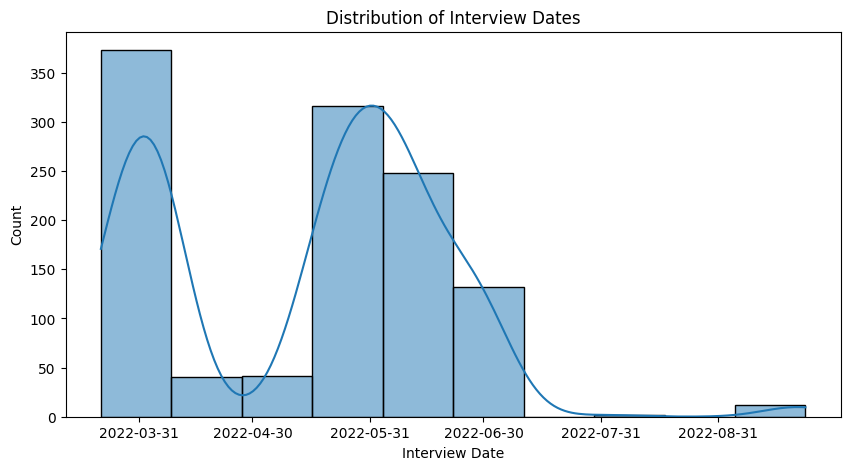

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df, bins=10, kde=True, x='dateI')

plt.xticks(pd.date_range(start=df['dateI'].min(),
                         end=df['dateI'].max(),
                         freq='ME'))

plt.xlabel('Interview Date')
plt.ylabel('Count')
plt.title('Distribution of Interview Dates')
plt.show()
